(32, 20000)


<IPython.core.display.Javascript object>


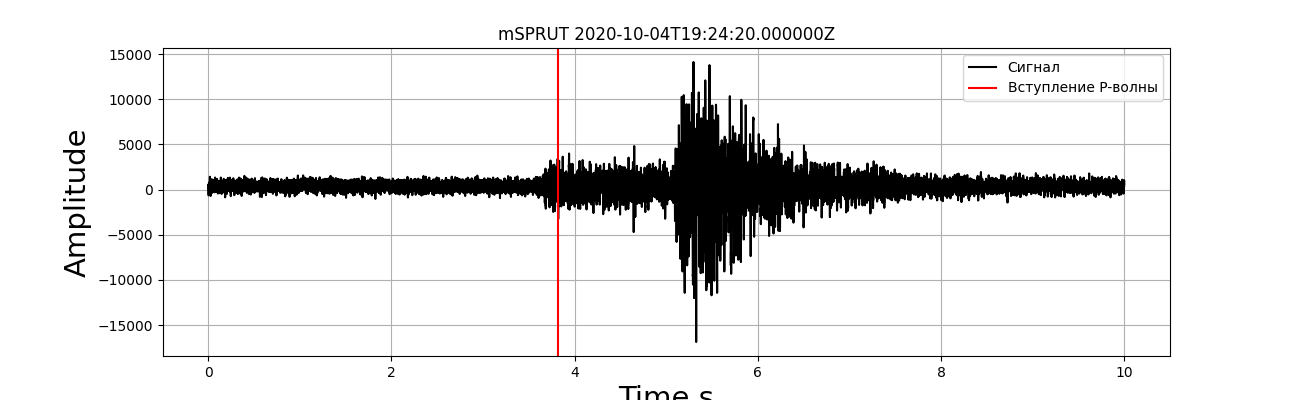

(3.8195, 8.968003065414306)


In [5]:
%matplotlib notebook

import numpy as np
import struct as st
import pandas as pd
import matplotlib.pyplot as plt
import obspy as obs
import PphasePicker

f = open(r"../example_no_events_detection/20201004_192420mSPRUT.00", 'rb') # путь к файлу

chanel_number = []
chanel_name = []
sensor_type = []
chanel_coef = []

chanels = st.unpack('H', f.read(2))[0] # Колличество каналов
f.read(2)
version = st.unpack('H', f.read(2))[0] # Версия
day = st.unpack('H', f.read(2))[0] # День
month = st.unpack('H', f.read(2))[0] # Месяц
year = st.unpack('H', f.read(2))[0] # Год
f.read(6)
acp = st.unpack('H', f.read(2))[0] # Разрядность АЦП
f.read(2)
freq = st.unpack('H', f.read(2))[0] # Частота
f.read(8)
station_name = st.unpack('6s10c', f.read(16))[0] # Название станции
station_name = str(station_name).replace('b', '')
station_name = station_name.replace("'", '')
f.read(24)
lat = st.unpack('d', f.read(8))[0] # Широта
long = st.unpack('d', f.read(8))[0] # Долгота
f.read(16)
time = st.unpack('Q', f.read(8))[0] # Начальное время
time_start = obs.UTCDateTime(time / 256000000 + 315532800)
f.read(8)

for i in range(chanels): 
    chanel_number.append(st.unpack('H', f.read(2))[0]) # Номер канала
    f.read(6)
    chanel_name.append(st.unpack('6i', f.read(24))[0]) # Имя канала
    sensor_type.append(st.unpack('6i', f.read(24))[0]) # Тип сенсора
    chanel_coef.append(st.unpack('d', f.read(8))[0]) # Коэффициент канала
    f.read(8)

data = np.fromfile(f, dtype=np.int, count=32*20000)
array = np.reshape(data, [32,20000], order='F')
array = array.astype(np.float64)
print(array.shape)
array.tofile('../example.bin')

res = PphasePicker.calculatePphasePicker(array[18], 0.0005,nbins=200,Tn=0.01, jump_finder=PphasePicker.SIGMA_FINDER, to_peak=False) # укажи канал с 17-20
x=np.arange(0, int(len(data)/chanels)*0.0005, 0.0005) # создаём по x точки для графика
plt.figure(figsize=(13, 4))
plt.plot(x, array[18],label='Сигнал',color='black') # меняем каналы!!!!
plt.axvline(res[0],color='red',label='Вступление P-волны')
plt.xlabel('Time,s',fontsize=21)
plt.ylabel('Amplitude',fontsize=21)
plt.title(station_name + ' ' + str(time_start))
plt.grid()
plt.legend()
print(res)
# if res[0]!=-1 and res[0]<0.3: # сделал условия, чтобы ловить те, которые рано сработали
    

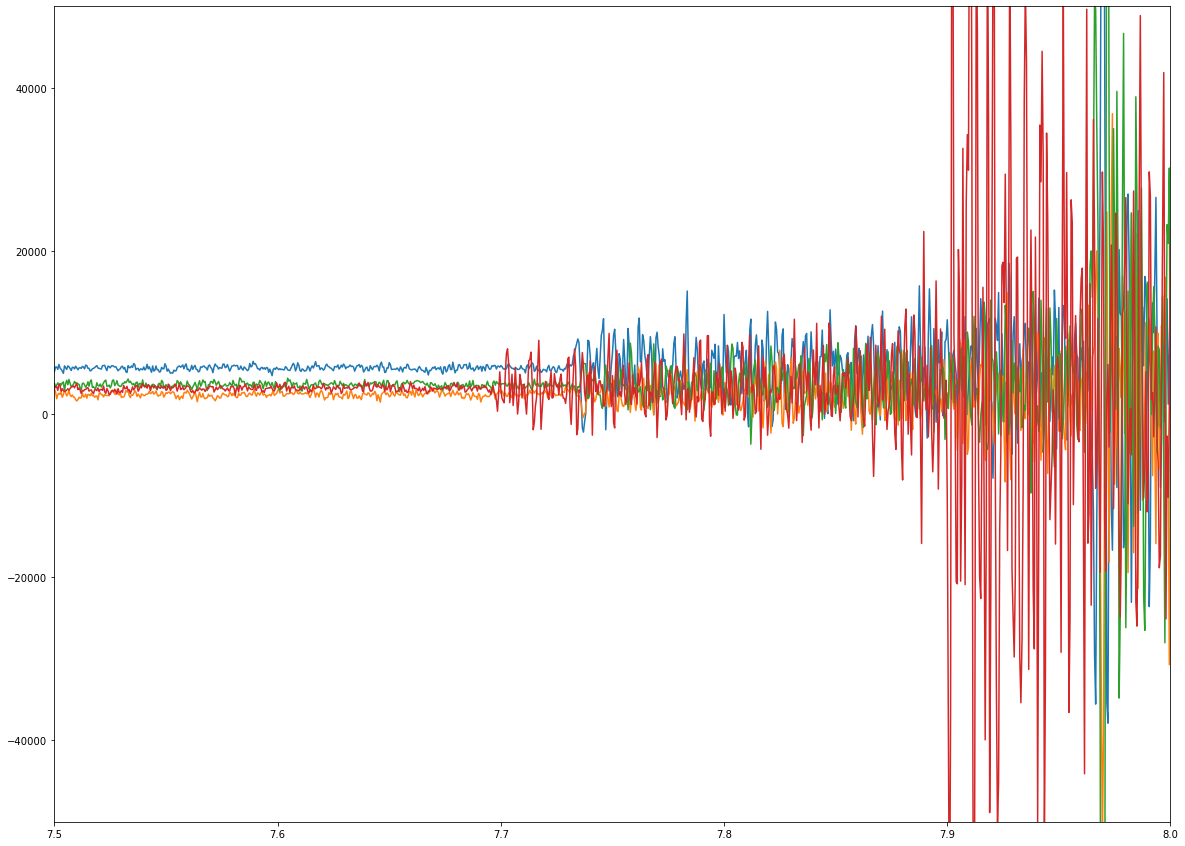

In [20]:
x=np.arange(0, int(len(data)/chanels)*0.0005, 0.0005) # создаём по x точки для графика
plt.figure(figsize=(20, 15))
plt.plot(x, array[17]) 
plt.plot(x, array[18])
plt.plot(x, array[19])
plt.plot(x, array[20])
plt.axis([7.5, 8, -50000, 50000])
plt.show()